In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from array import array
import struct

# EMNIST Dataset
This data set consists of digits and letters. Full description of this data can be found in this [paper](https://arxiv.org/abs/1702.05373v1). There are labelled 28 pixel by 28 pixel images. They are labelled by numbers and alphabets. There are different versions of data. We will be using the `byMerge` set, which has 37 symbols - 10 digits, 26 letters, and space.
The full data set can be downloaded from [here](https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip). However, we found the link to be unreliable in practice. You can find  a version of the data downloaded already in the `./data` directory.

In [6]:
# file paths
train_labels = "./data/emnist-bymerge-train-labels-idx1-ubyte"

test_images = './data/emnist-bymerge-test-images-idx3-ubyte'
test_labels = "./data/emnist-bymerge-test-labels-idx1-ubyte"

label_mappings = "./data/emnist-bymerge-mapping.txt"

# generate all the labels and the characters they represent
def map_labels():
    labels_dict = {}
    with open(label_mappings, 'rb') as f:
        # each row of the file has the label first and ascii code next
        for line in f:
            #print(line)
            items = line.split()
            #print(chr(int(items[1])))
            labels_dict.update({int(items[0]): chr(int(items[1]))})
    return labels_dict

In [15]:
# Read the images from the data format
with open(test_images,'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    ncols, nrows = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, ncols, nrows))


print("Test set size:", size)
print(data.shape)

# read the labels corresponding to the test images
with open(test_labels, 'rb') as tslbl:
    magic_nr, size = struct.unpack(">II", tslbl.read(8))
    test_lbl = array("b", tslbl.read())

Test set size: 116323
(116323, 28, 28)


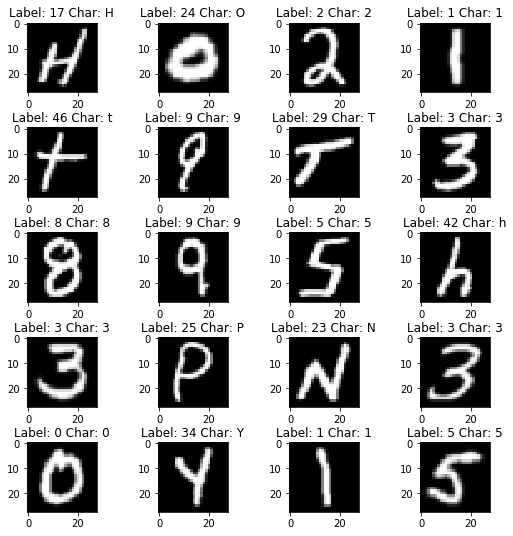

In [14]:
# Now, lets try and generate some sample images to see what the data looks like
labels = map_labels()

fig=plt.figure(figsize=(9, 9))  # show 8in X 8in image
columns = 4  # 4 images per row
rows = 5  # lay out images on 5 rows

for i in range(1, columns*rows +1):
    img_id = np.random.randint(0, data.shape[0])  # max number of images, from prev section
    fig.add_subplot(rows, columns, i)
    img_data = data[img_id,:,:]
    flipped = np.fliplr(img_data)  # images are horiontally flipped and 
    img_data = np.rot90(flipped)   # rotated 90 degrees
    plt.title('Label: %d Char: %s' % ( test_lbl[img_id], labels[test_lbl[img_id]]))
    plt.imshow(img_data, cmap='gray')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [37]:
# ensure we can read the training data set and get it's size
with open('data/emnist-bymerge-train-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))


print("Training set size:", size)
print(data.shape)

Training set size: 697932
(697932, 28, 28)


## Generate data distribution of images per label
Lets see how many samples do we have per label in training and test sets. This will give an idea of how unbaanced this data set is and it anything needs to be done to balance it. 

In [47]:
labels_dict = map_labels()
train_samples = []  # to store the counts
test_samples = []

with open(train_labels, 'rb') as trlbl:
    magic_nr, size = struct.unpack(">II", trlbl.read(8))
    train_lbl = array("b", trlbl.read())
    for label in list(labels_dict.keys()):
        train_samples.append((labels_dict[label], train_lbl.count(label)))


with open(test_labels, 'rb') as tslbl:
    magic_nr, size = struct.unpack(">II", tslbl.read(8))
    test_lbl = array("b", tslbl.read())
    for label in list(labels_dict.keys()):
        test_samples.append((labels_dict[label], test_lbl.count(label)))

print("Training samples distribution: ", train_samples)
print("Testing samples distribution: ", test_samples)

Training samples distribution:  [('0', 34618), ('1', 38304), ('2', 34307), ('3', 35285), ('4', 33656), ('5', 31280), ('6', 34150), ('7', 36020), ('8', 33924), ('9', 33882), ('A', 6411), ('B', 3874), ('C', 12963), ('D', 4606), ('E', 4925), ('F', 9098), ('G', 2534), ('H', 3097), ('I', 14733), ('J', 5689), ('K', 4998), ('L', 20381), ('M', 11612), ('N', 8237), ('O', 27664), ('P', 10748), ('Q', 2603), ('R', 5047), ('S', 23509), ('T', 9766), ('U', 15388), ('V', 7588), ('W', 7403), ('X', 5598), ('Y', 7092), ('Z', 5416), ('a', 10009), ('b', 5080), ('d', 10152), ('e', 24657), ('f', 2535), ('g', 3693), ('h', 8682), ('n', 11444), ('q', 2966), ('r', 14060), ('t', 18248)]
Testing samples distribution:  [('0', 5745), ('1', 6400), ('2', 5765), ('3', 5827), ('4', 5498), ('5', 5326), ('6', 5787), ('7', 5873), ('8', 5655), ('9', 5651), ('A', 1058), ('B', 652), ('C', 2156), ('D', 735), ('E', 860), ('F', 1524), ('G', 430), ('H', 576), ('I', 2413), ('J', 912), ('K', 809), ('L', 3358), ('M', 1984), ('N', 13

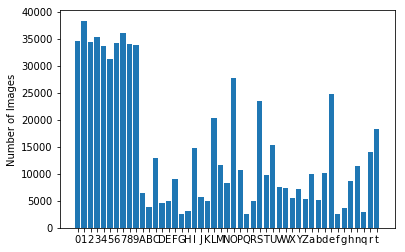

In [49]:
# Generate bar plot for training data
x_pos = np.arange(47)
train_scores = list(zip(*train_samples))[1]
train_labels = list(zip(*train_samples))[0]

plt.bar(x_pos, train_scores, align='center')
plt.xticks(x_pos, train_labels) 
plt.ylabel('Number of Images')
plt.show()

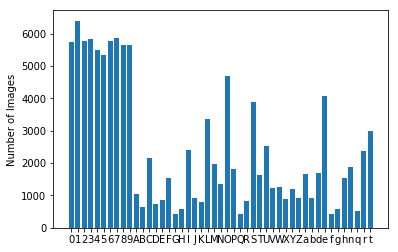

In [50]:
# Generate bar plot for training data
x_pos = np.arange(47)
test_scores = list(zip(*test_samples))[1]
test_labels = list(zip(*test_samples))[0]

plt.bar(x_pos, test_scores, align='center')
plt.xticks(x_pos, test_labels) 
plt.ylabel('Number of Images')
plt.show()